<a href="https://colab.research.google.com/github/diegogonzalezc/pandas_dt_routine/blob/main/12_pandas_routine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Temperature (°C) https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data#GlobalLandTemperaturesByCountry.csv

Topic https://data.worldbank.org/topic/climate-change

CO2 (kt) https://data.worldbank.org/indicator/EN.ATM.CO2E.KT

Forest (km2) https://data.worldbank.org/indicator/AG.LND.FRST.K2

Agricultura (km2) https://data.worldbank.org/indicator/AG.LND.AGRI.K2

Population (7mM) https://data.worldbank.org/indicator/SP.POP.TOTL

Electric power consumption (kWh per capita) https://data.worldbank.org/indicator/EG.USE.ELEC.KH.PC

## Carga de datos, creación del dataframe y revisión inicial de la información.

In [9]:
from google.colab import drive #para poder importar archivos desde drive es indispensable hacer el drive mount.
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [10]:
%cd '/content/drive/My Drive/Colab Notebooks/curso platzi Pandas/db' #cd le doy la ubicación actual de mi información para ser cargada
!ls # ls me muesta los archivos al interior de la unicación actual

/content/drive/My Drive/Colab Notebooks/curso platzi Pandas/db
API_19_DS2_en_csv_v2_3733206.csv
API_AG.LND.AGRI.K2_DS2_en_csv_v2_3751801.csv
API_AG.LND.FRST.K2_DS2_en_csv_v2_3751799.csv
API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_3733258.csv
API_EN.ATM.CO2E.KT_DS2_en_csv_v2_3731329.csv
API_SP.POP.TOTL_DS2_en_csv_v2_3731322.csv
covid_19_data.csv
covid_19_data.gsheet
GlobalLandTemperaturesByCountry.csv
london_merged.csv
meteorite-landings.csv
poblacion.csv
test.csv
text.xlsx


In [12]:
import pandas as pd # importo librerias
import numpy as np

In [13]:
df_temp = pd.read_csv('GlobalLandTemperaturesByCountry.csv') # se crea el data frame
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [14]:
df_temp.shape # vemos las dimensiones del dataframe

(577462, 4)

In [60]:
df_temp.info() # nos dá una idea de que tipo de datos vamos a tener dentro de nuestro dataframe.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127332 entries, 2715 to 577461
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             127332 non-null  object        
 1   AverageTemperature             126587 non-null  float64       
 2   AverageTemperatureUncertainty  127110 non-null  float64       
 3   Country                        127332 non-null  object        
 4   year                           127332 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 5.8+ MB


In [15]:
df_temp['Country'].unique() # todos los paises que se encuentran en nuestra base de datos.

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

## Manipulación, creación y Group by en columnas. 

In [16]:
df_temp['year']=pd.to_datetime(df_temp['dt']) #creamos una columna year a partir de dt, dtype: datetime, datetime nos da muchas facilidades a la hora de trabajar con fechas, es altamente recomendable hacerlo siempre. 
df_temp['year']

0        1743-11-01
1        1743-12-01
2        1744-01-01
3        1744-02-01
4        1744-03-01
            ...    
577457   2013-05-01
577458   2013-06-01
577459   2013-07-01
577460   2013-08-01
577461   2013-09-01
Name: year, Length: 577462, dtype: datetime64[ns]

In [17]:
idx= df_temp['year'] > pd.to_datetime('1970-01-01')# un filtro el en el cual solo se toman los datos a partir de 1970-01-01
df_temp=df_temp[idx]
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
2715,1970-02-01,-10.835,0.478,Åland,1970-02-01
2716,1970-03-01,-1.583,0.608,Åland,1970-03-01
2717,1970-04-01,0.493,0.463,Åland,1970-04-01
2718,1970-05-01,6.939,0.565,Åland,1970-05-01
2719,1970-06-01,14.252,0.676,Åland,1970-06-01
...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013-05-01
577458,2013-06-01,17.613,0.473,Zimbabwe,2013-06-01
577459,2013-07-01,17.000,0.453,Zimbabwe,2013-07-01
577460,2013-08-01,19.759,0.717,Zimbabwe,2013-08-01


In [18]:
df_temp_avg=df_temp.groupby(['Country', pd.Grouper(key='year',freq='1Y')]).agg({'AverageTemperature':[np.mean,np.median]}) #se agrupapor country y year, en year se toman los valores anuales, despues el resultado mediante un diccionario se obtiente la mediana y la media
df_temp_avg

AverageTemperature         
                                     mean   median
Country     year                                  
Afghanistan 1970-12-31          16.005455  16.1990
            1971-12-31          14.823500  14.9340
            1972-12-31          12.547167  13.8725
            1973-12-31          14.235500  14.9130
            1974-12-31          13.316750  13.6160
...                                   ...      ...
Åland       2009-12-31           6.489083   5.5765
            2010-12-31           4.861917   4.7550
            2011-12-31           7.170750   7.4990
            2012-12-31           6.063917   6.2540
            2013-12-31           6.229750   6.0140

[10692 rows x 2 columns]

In [19]:
df_temp_avg.xs('Mexico')['AverageTemperature'] # acá se toman los valores solamente de México

,mean,median
year,,
1970-12-31,21.036182,21.5130
1971-12-31,20.640333,20.6605
1972-12-31,20.975000,22.1485
1973-12-31,20.496167,20.8200
1974-12-31,20.631500,21.0005
1975-12-31,20.449333,20.9585
1976-12-31,20.145667,20.3740
1977-12-31,20.841250,21.0620
1978-12-31,20.755500,21.2615


In [61]:
df_temp_avg.loc['Mexico',:] # esta es otra opción, generalmente me gusta trabajar más con loc y iloc para buscar en los dataframes

AverageTemperature       
                         mean median
year                                
1970-12-31               21.0   21.5
1971-12-31               20.6   20.7
1972-12-31               21.0   22.1
1973-12-31               20.5   20.8
1974-12-31               20.6   21.0
1975-12-31               20.4   21.0
1976-12-31               20.1   20.4
1977-12-31               20.8   21.1
1978-12-31               20.8   21.3
1979-12-31               20.6   21.7
1980-12-31               21.0   20.8
1981-12-31               20.8   21.4
1982-12-31               21.1   21.7
1983-12-31               20.7   20.8
1984-12-31               20.5   21.4
1985-12-31               20.6   21.2
1986-12-31               20.9   21.6
1987-12-31               20.5   20.8
1988-12-31               20.7   21.4
1989-12-31               21.0   21.6
1990-12-31               21.0   21.4
1991-12-31               20.8   21.7
1992-12-31               20.7   21.2
1993-12-31               20.9   21.4
1994-12-31               21.3   21.6
1995-12-31               21.4   21.5
1996-12-31               21.1   21.3
1997-12-31               20.9   20.5
1998-12-31               21.5   21.7
1999-12-31               21.1   21.7
2000-12-31               21.2   21.6
2001-12-31               21.1   21.8
2002-12-31               21.2   22.4
2003-12-31               21.3   21.9
2004-12-31               20.9   21.6
2005-12-31               21.4   21.8
2006-12-31               21.4   22.4
2007-12-31               21.1   21.5
2008-12-31               21.1   21.8
2009-12-31               21.5   21.9
2010-12-31               20.9   21.3
2011-12-31               21.6   22.6
2012-12-31               21.7   22.4
2013-12-31               22.2   24.1

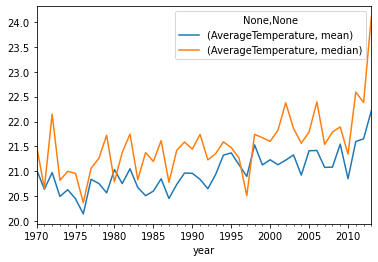

In [62]:
df_temp_avg.loc['Mexico',:].plot() # podemos ver el comportamiento año tras año de media y mediana

In [21]:
df_tmedian=df_temp_avg['AverageTemperature'][['median']].reset_index() #en este caso se va a tomar solo el  sub indice median y reiniciamos el index
df_tmedian

,Country,year,median
0,Afghanistan,1970-12-31,16.1990
1,Afghanistan,1971-12-31,14.9340
2,Afghanistan,1972-12-31,13.8725
3,Afghanistan,1973-12-31,14.9130
4,Afghanistan,1974-12-31,13.6160
...,...,...,...
10687,Åland,2009-12-31,5.5765
10688,Åland,2010-12-31,4.7550
10689,Åland,2011-12-31,7.4990
10690,Åland,2012-12-31,6.2540


In [22]:
df_tmedian['date']=df_tmedian['year'].dt.year #con dt.year puedo obtener el año en la columna year y aca sencillamente se creo otra columna ['date'] en la cual solo esta el año
df_tmedian

,Country,year,median,date
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


In [63]:
df_tmedian.info()#esta clumna nueva ya no es datetime, esto es importante tenerlo en cuenta para los posibles análisis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Country      10692 non-null  object        
 1   date         10692 non-null  datetime64[ns]
 2   temperature  10648 non-null  float64       
 3   year         10692 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 334.2+ KB


In [23]:
df_tmedian.rename(columns={'median':'temperature','year':'date','date':'year'},inplace=True) #se cambiaron los nombres de las columnas 
df_tmedian

,Country,date,temperature,year
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


## Pivot tables, visualizaciones y merge

In [64]:
df_t_pivot=df_tmedian.pivot_table(values='temperature',index='date',columns='Country') # las columnas pasaron a ser los paises y el indice las fechas, Los valores de las celdas ahora son la temperatura.
df_t_pivot

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,...,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
date,,,,,,,,,,,,,,,,,,,,,
1970-12-31,16.2,25.2,12.4,23.3,26.7,11.6,23.0,27.2,27.2,15.1,...,15.8,15.5,25.3,24.6,26.7,23.8,27.4,22.1,23.3,6.9
1971-12-31,14.9,24.8,11.7,22.8,26.5,11.9,22.5,26.5,26.4,14.8,...,16.5,13.0,24.6,24.1,26.2,20.3,26.5,21.8,22.7,4.5
1972-12-31,13.9,25.1,11.2,22.5,26.8,10.0,22.6,26.9,26.8,14.3,...,16.9,13.6,25.3,24.5,26.6,21.4,26.8,22.0,22.4,5.6
1973-12-31,14.9,25.3,11.8,23.0,27.0,9.6,23.1,27.3,27.2,14.9,...,17.5,13.5,25.2,25.0,27.1,22.9,27.2,22.1,22.6,3.6
1974-12-31,13.6,24.8,11.3,21.6,26.6,8.2,22.3,26.6,26.5,15.2,...,17.4,13.2,25.1,24.4,26.2,21.6,26.6,21.6,21.3,5.5
1975-12-31,13.5,24.8,12.4,23.1,26.7,10.4,22.4,26.5,26.3,15.2,...,17.2,13.3,25.0,25.0,26.3,20.5,26.1,21.9,21.8,6.0
1976-12-31,14.2,24.8,12.6,22.3,26.6,9.7,22.1,27.0,26.8,14.4,...,16.6,11.4,25.1,24.5,26.7,20.5,26.3,21.7,22.0,4.4
1977-12-31,15.7,25.0,12.0,23.5,26.7,10.4,22.6,27.2,27.0,16.0,...,18.3,13.8,25.6,24.6,26.9,22.7,26.9,22.2,22.3,5.5
1978-12-31,15.3,24.9,11.5,22.6,26.7,9.8,22.7,27.2,27.0,15.3,...,17.2,13.3,25.6,24.4,27.0,21.8,27.0,22.1,22.6,5.7


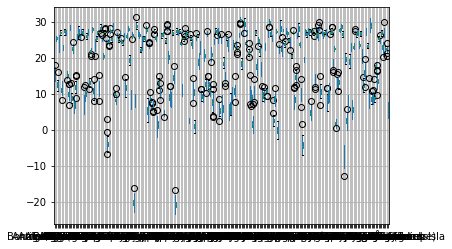

In [25]:
df_t_pivot.boxplot() # los boxplot muestan la comppsición de mediana, cuartil 1 , cuartil 3 y outliers.

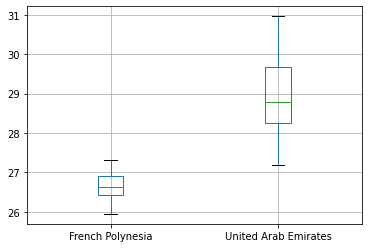

In [26]:
df_t_pivot.T.sample(2).T.boxplot() # acá tomamos dos datos aleatorios.

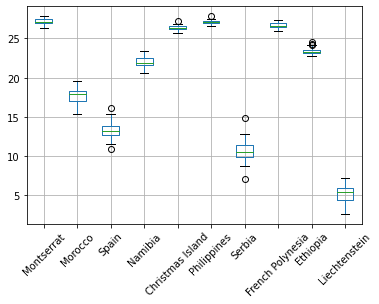

In [27]:
df_t_pivot.T.sample(10).T.boxplot(rot=45) # rot =45 me ayuda a rotar los nombres que se me sobreponian

In [28]:
!ls # es mejor siempre copiar y pegar los nombres de los archivos para evitar typos.

API_19_DS2_en_csv_v2_3733206.csv
API_AG.LND.AGRI.K2_DS2_en_csv_v2_3751801.csv
API_AG.LND.FRST.K2_DS2_en_csv_v2_3751799.csv
API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_3733258.csv
API_EN.ATM.CO2E.KT_DS2_en_csv_v2_3731329.csv
API_SP.POP.TOTL_DS2_en_csv_v2_3731322.csv
covid_19_data.csv
covid_19_data.gsheet
GlobalLandTemperaturesByCountry.csv
london_merged.csv
meteorite-landings.csv
poblacion.csv
test.csv
text.xlsx


In [29]:
df_agri=pd.read_csv('API_AG.LND.AGRI.K2_DS2_en_csv_v2_3751801.csv',header=2)
df_fore=pd.read_csv('API_AG.LND.FRST.K2_DS2_en_csv_v2_3751799.csv',header=2)
df_elec=pd.read_csv('API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_3733258.csv',header=2)
df_co2e=pd.read_csv('API_EN.ATM.CO2E.KT_DS2_en_csv_v2_3731329.csv',header=2)
df_popu=pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_3731322.csv',header=2)

In [30]:
df_agri

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,20.0,20.0,20.0,20.0,20.0,...,20.00,20.00,20.00,20.0,20.000,20.0,20.00,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,5326150.0,5322890.0,5327180.0,5323510.0,5320000.0,...,6459157.24,6477782.40,6497055.30,6505845.2,6515953.000,6521411.4,6532568.32,NaN,NaN,NaN
2,Afghanistan,AFG,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,377000.0,377600.0,378100.0,378730.0,378750.0,...,379100.00,379100.00,379100.00,379100.0,379100.000,379100.0,379190.00,NaN,NaN,NaN
3,Africa Western and Central,AFW,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,3025335.1,3035850.0,3059019.1,3070610.7,3094681.3,...,3574436.40,3594810.30,3597067.70,3599501.6,3608282.421,3612043.2,3614109.80,NaN,NaN,NaN
4,Angola,AGO,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,571700.0,572000.0,572200.0,572500.0,572700.0,...,536221.24,541771.86,547322.48,552873.1,558423.800,563974.3,569524.90,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,233370.0,233480.0,233600.0,233700.0,233800.0,...,235010.00,234990.00,234516.00,234326.0,233858.000,233877.0,233877.00,NaN,NaN,NaN
263,South Africa,ZAF,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,1013350.0,1001350.0,989950.0,977500.0,966100.0,...,963410.00,963410.00,963410.00,963410.0,963410.000,963410.0,963410.00,NaN,NaN,NaN
264,Zambia,ZMB,Agricultural land (sq. km),AG.LND.AGRI.K2,NaN,193070.0,193600.0,194040.0,194590.0,195130.0,...,238360.00,237360.00,238360.00,238360.0,238360.000,238360.0,238360.00,NaN,NaN,NaN


In [31]:
range(1971,2015)
map(str,range(1971,2015))
cols=['Country Name','Country Code']+list(map(str,range(1971,2015)))
#list(map(str,range(1971,2015) esto hace un rango lo vuelve un string , map para volverlo un objeto que itere durante todo el data frame y lo anexa a una lista

In [32]:
df_agri.loc[:,cols] # Se puede observar que se hizo un cambio en el data frame original, se creo una columna por cada uno de los años y se tomó el valor de cada uno de estos.


,Country Name,Country Code,1971,1972,1973,1974,1975,1976,1977,1978,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Aruba,ABW,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,20.00,20.00,20.00,20.00,20.00,20.0,20.00,20.00,20.00,20.00
1,Africa Eastern and Southern,AFE,5360170.0,5365870.0,5366130.0,5367810.0,5371960.0,5374560.0,5374970.0,5385870.0,...,5294720.25,5309259.72,5324692.99,5356256.56,5380079.83,5398501.8,6392500.50,6459157.24,6477782.40,6497055.30
2,Afghanistan,AFG,380360.0,380460.0,380480.0,380480.0,380480.0,380480.0,380500.0,380500.0,...,379100.00,379100.00,379100.00,379100.00,379100.00,379110.0,379100.00,379100.00,379100.00,379100.00
3,Africa Western and Central,AFW,3102665.6,3060380.0,3111330.0,3064870.0,3060690.0,3066700.0,3023890.0,3013030.0,...,3480862.45,3481821.00,3497969.35,3524364.40,3536365.75,3551895.8,3559485.78,3574436.40,3594810.30,3597067.70
4,Angola,AGO,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,574000.0,...,497366.95,502917.56,508468.17,514018.78,519569.39,525120.0,530670.62,536221.24,541771.86,547322.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5700.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,234260.0,234370.0,234420.0,234470.0,234600.0,234600.0,234600.0,234620.0,...,235230.00,236270.00,236270.00,235170.00,234520.00,235790.0,234520.00,235010.00,234990.00,234516.00
263,South Africa,ZAF,953900.0,951950.0,949900.0,948050.0,945850.0,943820.0,943200.0,942800.0,...,974830.00,968880.00,968900.00,971080.00,969880.00,968910.0,963740.00,963410.00,963410.00,963410.00
264,Zambia,ZMB,200530.0,202510.0,201440.0,202020.0,202370.0,204100.0,202740.0,201550.0,...,227620.00,230480.00,229840.00,230870.00,235860.00,234360.0,236360.00,238360.00,237360.00,238360.00


In [33]:
df_agri.loc[:,cols].melt(id_vars=['Country Name','Country Code']) # deja las columnas de id_vars iguales y crea dos variables en las columnas una con los años que eran columnas y otra con el valor correspondiente


,Country Name,Country Code,variable,value
0,Aruba,ABW,1971,20.0
1,Africa Eastern and Southern,AFE,1971,5360170.0
2,Afghanistan,AFG,1971,380360.0
3,Africa Western and Central,AFW,1971,3102665.6
4,Angola,AGO,1971,574000.0
...,...,...,...,...
11699,Kosovo,XKX,2014,NaN
11700,"Yemen, Rep.",YEM,2014,234516.0
11701,South Africa,ZAF,2014,963410.0
11702,Zambia,ZMB,2014,238360.0


In [34]:
df_agri.loc[:,cols].melt(id_vars=['Country Name','Country Code']).rename(columns={'Country Name':'Country','value':'agriculture','variable':'year','Country Code':'name'})# todo este proceso se hizo con el fin de tener year con el formato adecuado

,Country,name,year,agriculture
0,Aruba,ABW,1971,20.0
1,Africa Eastern and Southern,AFE,1971,5360170.0
2,Afghanistan,AFG,1971,380360.0
3,Africa Western and Central,AFW,1971,3102665.6
4,Angola,AGO,1971,574000.0
...,...,...,...,...
11699,Kosovo,XKX,2014,NaN
11700,"Yemen, Rep.",YEM,2014,234516.0
11701,South Africa,ZAF,2014,963410.0
11702,Zambia,ZMB,2014,238360.0


In [35]:
def formato(df, col='agriculture'):
  return df.loc[:,cols].melt(id_vars=['Country Name','Country Code']).rename(columns={'Country Name':'Country','value':col,'variable':'year','Country Code':'name'})

# el formato que hicimos anteriormente lo agregamos una funcion para automatizar el proceso, los datos de entrada de la funcion son el df y la columna

In [36]:
df_agri=formato(df_agri,col='agriculture')
df_fore=formato(df_fore,col='forest')
df_elec=formato(df_elec,col='electricprod')
df_co2e=formato(df_co2e,col='co2')
df_popu=formato(df_popu,col='population')

# se aplica la función a cada dataframe

In [37]:
df_popu

,Country,name,year,population
0,Aruba,ABW,1971,59442.0
1,Africa Eastern and Southern,AFE,1971,175100167.0
2,Afghanistan,AFG,1971,11475450.0
3,Africa Western and Central,AFW,1971,123184308.0
4,Angola,AGO,1971,6041239.0
...,...,...,...,...
11699,Kosovo,XKX,2014,1812771.0
11700,"Yemen, Rep.",YEM,2014,25823488.0
11701,South Africa,ZAF,2014,54544184.0
11702,Zambia,ZMB,2014,15399793.0


In [38]:
df_popu['year']=df_popu['year'].astype(float)
df_fore['year']=df_fore['year'].astype(float)
df_elec['year']=df_elec['year'].astype(float)
df_co2e['year']=df_co2e['year'].astype(float)
df_agri['year']=df_popu['year'].astype(float)

In [39]:
df_tmedian

,Country,date,temperature,year
0,Afghanistan,1970-12-31,16.1990,1970
1,Afghanistan,1971-12-31,14.9340,1971
2,Afghanistan,1972-12-31,13.8725,1972
3,Afghanistan,1973-12-31,14.9130,1973
4,Afghanistan,1974-12-31,13.6160,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.5765,2009
10688,Åland,2010-12-31,4.7550,2010
10689,Åland,2011-12-31,7.4990,2011
10690,Åland,2012-12-31,6.2540,2012


In [40]:

df_merge=pd.merge(df_tmedian[['Country','temperature','year']],df_popu, on=['Country','year'], how='inner') # hacemos un merge con todos los datos  de df_median desde inner es decir, toma los valores de country y year que esten el los dos DataFrames
df_merge

,Country,temperature,year,name,population
0,Afghanistan,14.9340,1971,AFG,11475450.0
1,Afghanistan,13.8725,1972,AFG,11791222.0
2,Afghanistan,14.9130,1973,AFG,12108963.0
3,Afghanistan,13.6160,1974,AFG,12412960.0
4,Afghanistan,13.5130,1975,AFG,12689164.0
...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526964.0
7220,Zimbabwe,23.3040,2010,ZWE,12697728.0
7221,Zimbabwe,22.9420,2011,ZWE,12894323.0
7222,Zimbabwe,23.0455,2012,ZWE,13115149.0


In [41]:
df_merge=pd.merge(df_merge,df_fore, on=['Country','year','name'], how='inner')
df_merge=pd.merge(df_merge,df_elec, on=['Country','year','name'], how='inner')
df_merge=pd.merge(df_merge,df_co2e, on=['Country','year','name'], how='inner')
df_merge=pd.merge(df_merge,df_agri, on=['Country','year','name'], how='inner') # así se van juntndo todos los dataframes en las columnas que comparten ['Country','year','name']

In [42]:
df_climate=df_merge.dropna()
df_climate

,Country,temperature,year,name,population,forest,electricprod,co2,agriculture
62,Albania,13.4490,1990,ALB,3286542.0,7888.0,552.252185,6050.0,11210.0
63,Albania,11.5885,1991,ALB,3266790.0,7868.5,418.453589,4110.0,11270.0
64,Albania,13.5850,1992,ALB,3247039.0,7849.0,453.644074,2240.0,11270.0
65,Albania,13.6500,1993,ALB,3227287.0,7829.5,536.363825,2070.0,11260.0
66,Albania,13.2390,1994,ALB,3207536.0,7810.0,596.407959,2140.0,11260.0
...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.4860,2009,ZWE,12526964.0,179513.5,585.457099,7750.0,163000.0
7220,Zimbabwe,23.3040,2010,ZWE,12697728.0,179052.8,606.643960,9810.0,162000.0
7221,Zimbabwe,22.9420,2011,ZWE,12894323.0,178592.1,636.248991,11490.0,164000.0
7222,Zimbabwe,23.0455,2012,ZWE,13115149.0,178131.4,608.761669,12110.0,162000.0


## Análisi finales, graficas y correlaciones.

In [43]:
df_climate.groupby('Country')['co2'].median().sort_values(ascending=False) # se argupa por pais y se busca que pais tiene mas co2 

Country
North America    5.979791e+06
United States    5.470430e+06
China            3.667540e+06
Japan            1.173390e+06
India            9.707050e+05
                     ...     
Suriname         1.500000e+03
Mozambique       1.500000e+03
Togo             1.430000e+03
Niger            8.050000e+02
Eritrea          6.400000e+02
Name: co2, Length: 120, dtype: float64

In [44]:
pd.set_option('display.float_format','{:,.1f}'.format) # esto sirve para cambiar el formato de notacion, separar por , los miles y . los float tomando solo 1 float

In [65]:
df_climate.groupby('Country')['co2'].median().sort_values(ascending=False)

Country
North America   5,979,791.3
United States   5,470,430.0
China           3,667,540.0
Japan           1,173,390.0
India             970,705.0
                    ...    
Suriname            1,500.0
Mozambique          1,500.0
Togo                1,430.0
Niger                 805.0
Eritrea               640.0
Name: co2, Length: 120, dtype: float64

In [45]:
first_10=df_climate.groupby('Country')['co2'].median().sort_values(ascending=False).head(10).index #filtramos los primeros 10 paises que producen CO2
list(first_10)

['North America',
 'United States',
 'China',
 'Japan',
 'India',
 'Germany',
 'United Kingdom',
 'Canada',
 'Italy',
 'Mexico']

In [46]:
df_mx_co2= df_climate[df_climate['Country'].isin(['North America', 'United States', 'China', 'Japan', 'India', 'Germany','United Kingdom', 'Canada', 'Italy', 'Mexico'])]
df_mx_co2
# me traje el listado filtrado  de paises que me interesaba revisar, esta es la manera de filtrar con una lista.

,Country,temperature,year,name,population,forest,electricprod,co2,agriculture
1266,Canada,-4.6,1990,CAN,"27,691,138.0","3,482,729.3","16,167.4","419,120.0","614,030.0"
1267,Canada,-4.2,1991,CAN,"28,037,420.0","3,482,258.3","16,181.6","412,930.0","615,332.5"
1268,Canada,-5.0,1992,CAN,"28,371,264.0","3,481,787.4","16,164.4","426,000.0","614,650.0"
1269,Canada,-4.0,1993,CAN,"28,684,764.0","3,481,316.4","16,320.1","422,680.0","613,970.0"
1270,Canada,-3.4,1994,CAN,"29,000,663.0","3,480,845.5","16,388.3","438,820.0","613,290.0"
...,...,...,...,...,...,...,...,...,...
7004,United States,8.4,2009,USA,"306,771,529.0","3,082,016.0","12,913.7","5,159,550.0","4,089,470.0"
7005,United States,10.2,2010,USA,"309,327,143.0","3,087,200.0","13,394.9","5,392,870.0","4,069,917.0"
7006,United States,9.5,2011,USA,"311,583,481.0","3,089,950.0","13,245.9","5,172,100.0","4,050,364.0"
7007,United States,9.9,2012,USA,"313,877,662.0","3,092,700.0","12,964.2","4,950,210.0","4,030,810.5"


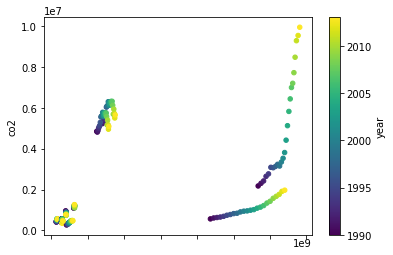

In [47]:
df_mx_co2.set_index('Country').plot.scatter(
    x='population',
    y='co2',
    c='year',
    colormap='viridis')
#en esta grafica se ve que a medida que pasan los años la mayoria de aises aumentan su consumo de co2 y su poblacion 

In [48]:
df_climate.corr()

,temperature,year,population,forest,electricprod,co2,agriculture
temperature,1.0,0.0,-0.0,-0.1,-0.4,-0.2,-0.1
year,0.0,1.0,0.0,-0.0,0.1,0.0,-0.0
population,-0.0,0.0,1.0,0.4,-0.1,0.6,0.6
forest,-0.1,-0.0,0.4,1.0,0.2,0.7,0.7
electricprod,-0.4,0.1,-0.1,0.2,1.0,0.2,0.1
co2,-0.2,0.0,0.6,0.7,0.2,1.0,0.8
agriculture,-0.1,-0.0,0.6,0.7,0.1,0.8,1.0


In [49]:
import seaborn as sns

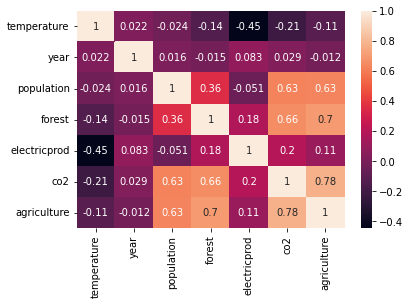

In [50]:
sns.heatmap(df_climate.corr(),annot=True)

# en esta grafica de correlacion podemos observar que las variables mas claras tienen una gran correlacion entre si, por ejemplo el co2 tiene una gran correlacion con agriultura
#

In [51]:
df_med=df_climate.groupby('year').median() # todos los valores promedios de los paises por año
df_med

,temperature,population,forest,electricprod,co2,agriculture
year,,,,,,
1990,22.7,"10,230,931.0","63,710.0","1,157.4","29,250.0","91,700.0"
1991,22.4,"10,346,663.5","63,349.1","1,072.5","27,345.0","91,870.0"
1992,19.9,"9,748,274.5","46,809.8","1,451.8","24,085.0","89,700.0"
1993,20.6,"9,877,647.0","45,837.1","1,520.3","24,080.0","83,965.0"
1994,20.5,"10,014,523.5","45,468.5","1,582.7","25,515.0","85,220.0"
1995,20.0,"10,081,493.5","44,901.8","1,606.4","27,300.0","77,575.0"
1996,19.9,"10,110,291.0","44,265.8","1,707.6","28,315.0","78,345.0"
1997,20.2,"10,113,205.0","43,629.8","1,782.6","28,945.0","79,280.0"
1998,21.2,"10,116,079.5","42,993.8","1,807.8","28,965.0","80,410.0"


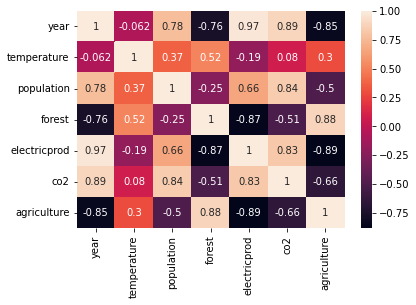

In [52]:
sns.heatmap(df_med.reset_index().corr(),annot=True)

In [53]:
from  pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae9c9c2450>,
      dtype=object)

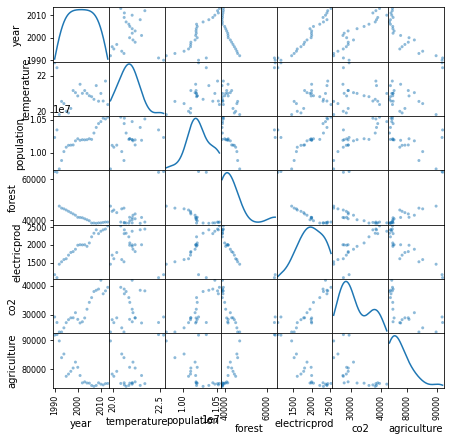

In [54]:
scatter_matrix(df_med.reset_index(),diagonal ='kde',figsize=(7,7))
# gaficas de cada una con correlaion

In [55]:
from pandas.plotting import parallel_coordinates

In [67]:
df_suramerica= df_climate[df_climate['Country'].isin(['Colombia','Argenitna','Bolivia','Mexico','Peru','Chile'])][['Country','temperature','forest','co2','agriculture']] # la primera parte del filtro se encarga de buscar las filas con los paises seleccionados
df_suramerica#la segunda filtrar las columnas que queremos

,Country,temperature,forest,co2,agriculture
879,Bolivia,22.1,"578,047.2","5,680.0","354,550.0"
880,Bolivia,22.4,"575,343.9","5,770.0","357,960.0"
881,Bolivia,22.1,"572,640.5","6,820.0","358,310.0"
882,Bolivia,22.1,"569,937.2","7,820.0","362,130.0"
883,Bolivia,22.5,"567,233.9","9,040.0","363,510.0"
...,...,...,...,...,...
5370,Peru,20.6,"741,746.0","41,680.0","239,460.0"
5371,Peru,20.5,"740,498.0","45,570.0","240,230.0"
5372,Peru,20.3,"738,787.5","48,580.0","241,040.0"
5373,Peru,20.6,"737,076.9","48,370.0","243,321.0"


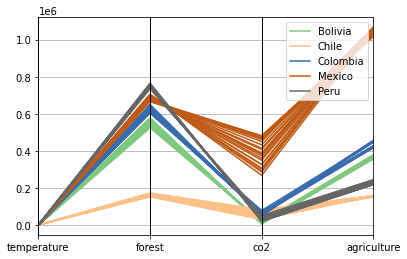

In [57]:
parallel_coordinates(df_suramerica,'Country',colormap='Accent')